In [80]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ShelterLink\AppData\Roaming\nltk_data...


In [48]:
#import data
#data on Kenya Power Tweets scraped using Octoparse 8 & saved to KenyaPower_Twitter.csv
df = pd.read_csv('KenyaPower_Twitter.csv')
df.head()

,Field2,Time,Tweets\n,Comments,Retweets,Likes
0,Kenya Power,2023-03-01T04:44:45.000Z,"Good Morning, follow this link to understand y...",506.0,37.0,216.0
1,Kenya Power,2023-04-02T17:28:29.000Z,"Hello. Please be advised, the following areas ...",22.0,9.0,22.0
2,Kenya Power,2023-04-01T19:49:35.000Z,@MselaOya Hello. Please share the following de...,NaN,NaN,NaN
3,The Kenya Power & Lighting Company Plc.,2023-03-30T15:57:37.000Z,NaN,344.0,117.0,286.0
4,Kenya Power,2023-03-30T08:18:28.000Z,NaN,56.0,10.0,56.0


In [49]:
# Remove special characters
df.replace('[^\w\s]', '', regex=True, inplace=True)
# Convert text to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
# Remove NaN values
df = df.dropna()
df.head()

,Field2,Time,Tweets\n,Comments,Retweets,Likes
0,kenya power,20230301t044445000z,good morning follow this link to understand yo...,506.0,37.0,216.0
1,kenya power,20230402t172829000z,hello please be advised the following areas wi...,22.0,9.0,22.0
7,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0
9,kenya power,20230328t173659000z,good evening the listed areas will be affected...,262.0,65.0,132.0
16,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0


In [53]:
# Tokenize the data

#tokenize function
def tokenize(txt):
    tokens = re.split('\W+',txt)
    return tokens

#apply function to tweets column
df['tokenized_tweets'] = df['Tweets\n'].apply(lambda x: tokenize(x))
df.head()

,Field2,Time,Tweets\n,Comments,Retweets,Likes,tokenized_tweets
0,kenya power,20230301t044445000z,good morning follow this link to understand yo...,506.0,37.0,216.0,"[good, morning, follow, this, link, to, unders..."
1,kenya power,20230402t172829000z,hello please be advised the following areas wi...,22.0,9.0,22.0,"[hello, please, be, advised, the, following, a..."
7,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ..."
9,kenya power,20230328t173659000z,good evening the listed areas will be affected...,262.0,65.0,132.0,"[good, evening, the, listed, areas, will, be, ..."
16,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ..."


In [61]:
#stopwords
stopwords=nltk.corpus.stopwords.words('english')
#remove stopwords
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

#create a new column for the clean data
df ['tweets_no_sw']=df['tokenized_tweets'].apply(lambda x: remove_stopwords(x))
df.head()


,Field2,Time,Tweets\n,Comments,Retweets,Likes,tokenized_tweets,tweets_no_sw
0,kenya power,20230301t044445000z,good morning follow this link to understand yo...,506.0,37.0,216.0,"[good, morning, follow, this, link, to, unders...","[good, morning, follow, link, understand, bill, ]"
1,kenya power,20230402t172829000z,hello please be advised the following areas wi...,22.0,9.0,22.0,"[hello, please, be, advised, the, following, a...","[hello, please, advised, following, areas, sch..."
7,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int..."
9,kenya power,20230328t173659000z,good evening the listed areas will be affected...,262.0,65.0,132.0,"[good, evening, the, listed, areas, will, be, ...","[good, evening, listed, areas, affected, plann..."
16,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int..."


In [63]:
#stemming the data using Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [67]:
#stemming function
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

#pass the data to the function
df['tweets_stemmed'] = df['tweets_no_sw'].apply(lambda x:stemming(x))
df.head()

,Field2,Time,Tweets\n,Comments,Retweets,Likes,tokenized_tweets,tweets_no_sw,tweets_stemmed
0,kenya power,20230301t044445000z,good morning follow this link to understand yo...,506.0,37.0,216.0,"[good, morning, follow, this, link, to, unders...","[good, morning, follow, link, understand, bill, ]","[good, morn, follow, link, understand, bill, ]"
1,kenya power,20230402t172829000z,hello please be advised the following areas wi...,22.0,9.0,22.0,"[hello, please, be, advised, the, following, a...","[hello, please, advised, following, areas, sch...","[hello, pleas, advis, follow, area, schedul, m..."
7,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int...","[hello, area, affect, schedul, power, interrup..."
9,kenya power,20230328t173659000z,good evening the listed areas will be affected...,262.0,65.0,132.0,"[good, evening, the, listed, areas, will, be, ...","[good, evening, listed, areas, affected, plann...","[good, even, list, area, affect, plan, power, ..."
16,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int...","[hello, area, affect, schedul, power, interrup..."


In [82]:
#lemmatization
wn=nltk.WordNetLemmatizer()
def lemmatization(token_text):
    text=[wn.lemmatize(word) for word in token_text]
    return text
df['tweet_lemma']=df['tweets_stemmed'].apply(lambda x:lemmatization(x))
df.head()


,Field2,Time,Tweets\n,Comments,Retweets,Likes,tokenized_tweets,tweets_no_sw,tweets_stemmed,tweet_lemma
0,kenya power,20230301t044445000z,good morning follow this link to understand yo...,506.0,37.0,216.0,"[good, morning, follow, this, link, to, unders...","[good, morning, follow, link, understand, bill, ]","[good, morn, follow, link, understand, bill, ]","[good, morn, follow, link, understand, bill, ]"
1,kenya power,20230402t172829000z,hello please be advised the following areas wi...,22.0,9.0,22.0,"[hello, please, be, advised, the, following, a...","[hello, please, advised, following, areas, sch...","[hello, pleas, advis, follow, area, schedul, m...","[hello, plea, advis, follow, area, schedul, ma..."
7,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int...","[hello, area, affect, schedul, power, interrup...","[hello, area, affect, schedul, power, interrup..."
9,kenya power,20230328t173659000z,good evening the listed areas will be affected...,262.0,65.0,132.0,"[good, evening, the, listed, areas, will, be, ...","[good, evening, listed, areas, affected, plann...","[good, even, list, area, affect, plan, power, ...","[good, even, list, area, affect, plan, power, ..."
16,kenya power,20230329t174827000z,hello these areas will be affected by schedule...,215.0,98.0,231.0,"[hello, these, areas, will, be, affected, by, ...","[hello, areas, affected, scheduled, power, int...","[hello, area, affect, schedul, power, interrup...","[hello, area, affect, schedul, power, interrup..."


In [83]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 415.2 kB/s eta 0:00:00


In [87]:
#WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



Matplotlib is building the font cache; this may take a moment.


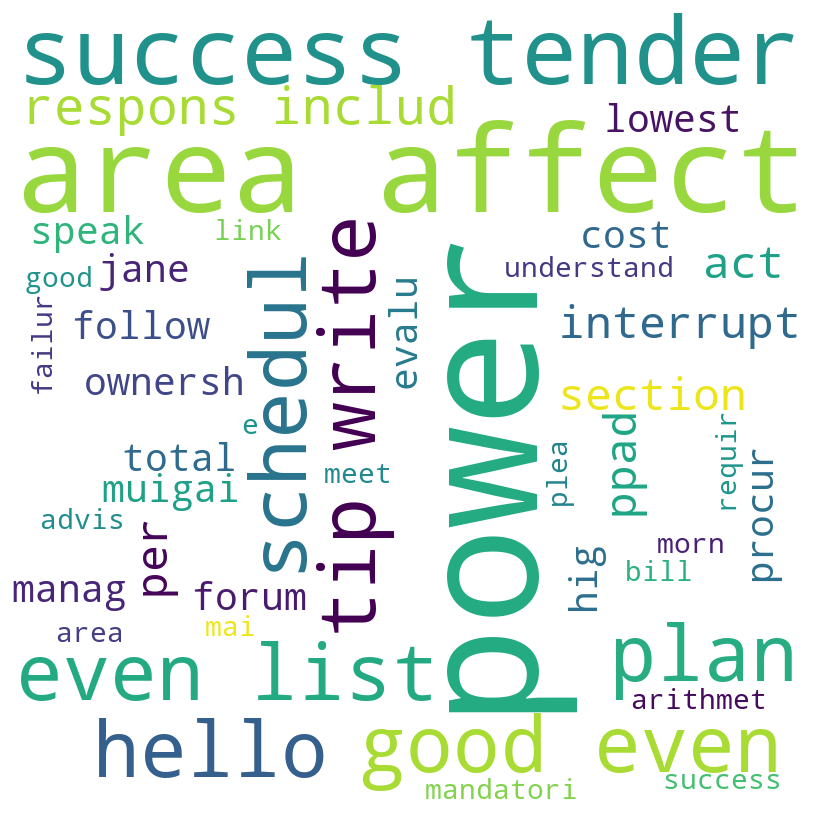

In [93]:
column_data=df['tweet_lemma']

# Convert the column data to a string
column_string = column_data.to_string(index=False)

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(column_string)

# Display the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()




In [94]:
df.to_csv('cleaned_kenyapower_data.csv', index=False)